In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/OnlineRetail.csv', encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df.info()
df.isnull().sum()
print("Unique Countries:", df['Country'].nunique())
print("Date Range:", df['InvoiceDate'].min(), "to", df['InvoiceDate'].max())
print("Number of unique products:", df['Description'].nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
Unique Countries: 38
Date Range: 1/10/2011 10:04 to 9/9/2011 9:52
Number of unique products: 4223


In [5]:
df = df.dropna(subset=['CustomerID', 'Description']) #removed missing values
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')] #removed canceled orders
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate']) #converted InvoiceDate to DateTime Format

In [6]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      397924 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


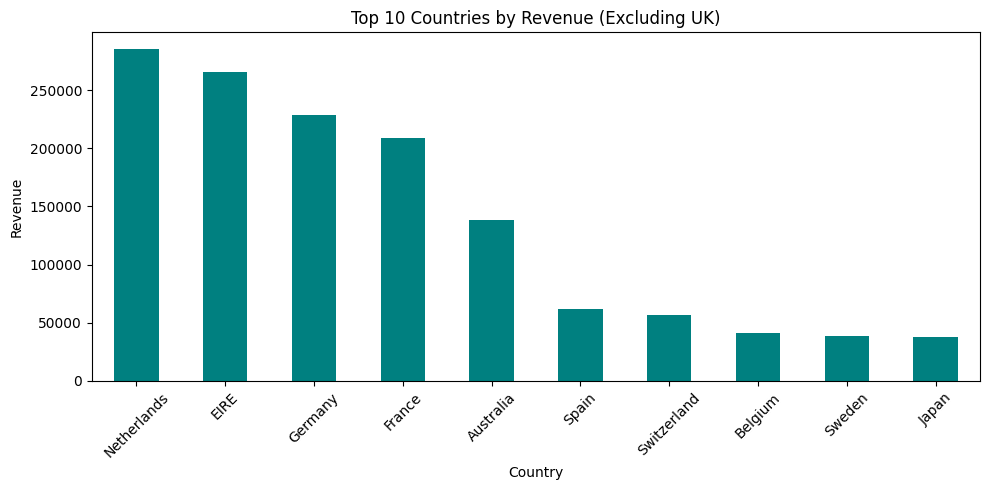

In [7]:
#Top 10 Countries by Revenue (Exlcuding UK)

# Calculate revenue column
df['Revenue'] = df['Quantity'] * df['UnitPrice']

# Group by Country and sum revenue
country_revenue = df[df['Country'] != 'United Kingdom'].groupby('Country')['Revenue'].sum().sort_values(ascending=False).head(10)

# Plot
import matplotlib.pyplot as plt
country_revenue.plot(kind='bar', figsize=(10, 5), color='teal')
plt.title("Top 10 Countries by Revenue (Excluding UK)")
plt.ylabel("Revenue")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

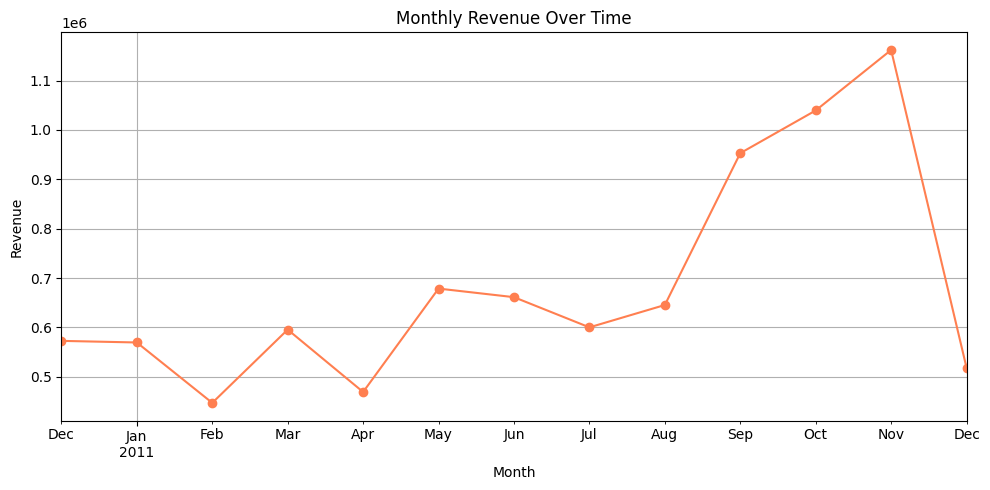

In [8]:
# Monthly Revenue Trends

# Convert InvoiceDate to datetime and extract month
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Month'] = df['InvoiceDate'].dt.to_period('M')

# Group by Month
monthly_revenue = df.groupby('Month')['Revenue'].sum()

# Plot
monthly_revenue.plot(kind='line', figsize=(10,5), marker='o', color='coral')
plt.title("Monthly Revenue Over Time")
plt.ylabel("Revenue")
plt.xlabel("Month")
plt.grid(True)
plt.tight_layout()
plt.show()

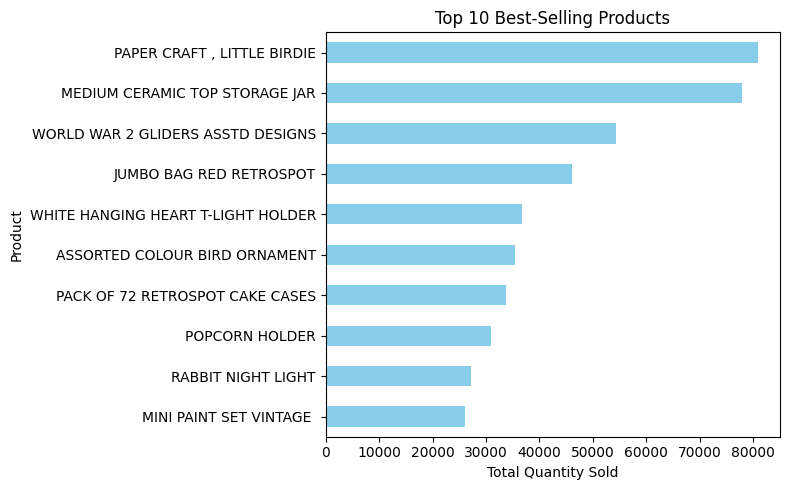

In [9]:
# Top 10 Best-Selling Products

top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

top_products.plot(kind='barh', figsize=(8,5), color='skyblue')
plt.title("Top 10 Best-Selling Products")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Product")
plt.gca().invert_yaxis()  # Highest at top
plt.tight_layout()
plt.show()

In [10]:
# RFM (Recency , Frequency , Monetary) Analysis

import datetime as dt

# Reference date is 1 day after the last purchase
ref_date = df['InvoiceDate'].max() + dt.timedelta(days=1)

rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (ref_date - x.max()).days,   # Recency
    'InvoiceNo': 'nunique',                                # Frequency
    'Revenue': 'sum'                                       # Monetary
})

rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm = rfm.reset_index()
rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,310,1,334.40


In [11]:
#RFM Scoring

# Assign scores: Recency (lower is better), Frequency and Monetary (higher is better)
rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1]).astype(int)
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, labels=[1, 2, 3, 4]).astype(int)
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 4, labels=[1, 2, 3, 4]).astype(int)

# Combine them into one RFM Score
rfm['RFM_Segment'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

# Average RFM score
rfm['RFM_Score'] = rfm[['R_Score', 'F_Score', 'M_Score']].mean(axis=1)
rfm.head()

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment,RFM_Score
0,12346.0,326,1,77183.60,1,1,4,114,2.000000
1,12347.0,2,7,4310.00,4,4,4,444,4.000000
2,12348.0,75,4,1797.24,2,3,4,234,3.000000
3,12349.0,19,1,1757.55,3,1,4,314,2.666667
4,12350.0,310,1,334.40,1,1,2,112,1.333333


In [12]:
#Defining Customer Segments

def segment_customer(row):
    if row['RFM_Score'] >= 3.5:
        return 'Loyal'
    elif row['R_Score'] >= 3 and row['F_Score'] >= 3:
        return 'Potential Loyalist'
    elif row['R_Score'] == 4:
        return 'Recent Customers'
    elif row['RFM_Score'] <= 1.5:
        return 'Churned'
    else:
        return 'Others'

rfm['Segment'] = rfm.apply(segment_customer, axis=1)
rfm[['CustomerID', 'RFM_Segment', 'RFM_Score', 'Segment']].head()

,CustomerID,RFM_Segment,RFM_Score,Segment
0,12346.0,114,2.000000,Others
1,12347.0,444,4.000000,Loyal
2,12348.0,234,3.000000,Others
3,12349.0,314,2.666667,Others
4,12350.0,112,1.333333,Churned


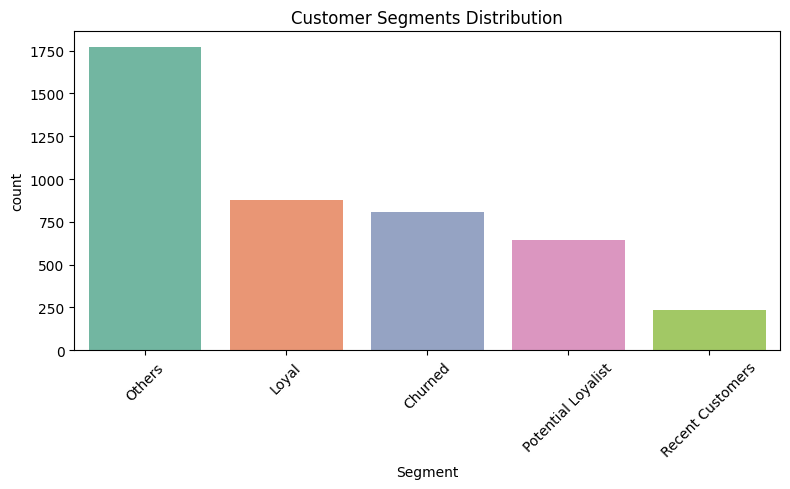

In [13]:
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.countplot(
    data=rfm,
    x='Segment',
    hue='Segment',
    order=rfm['Segment'].value_counts().index,
    palette='Set2',
    legend=False
)
plt.title('Customer Segments Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
# Export cleaned dataset
df.to_csv('cleaned_online_retail.csv', index=False)

# Then download it
from google.colab import files
files.download('cleaned_online_retail.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:
rfm.to_csv('rfm_analysis.csv', index=False)

In [16]:
from google.colab import files
files.download('rfm_analysis.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>